# Machine Learning

*Лектор: Екатерина Лобачева*

*Факультет экономических наук НИУ ВШЭ, 2017-18 учебный год*

[Страница курса](http://wiki.cs.hse.ru/Машинное_обучение_(факультет_экономических_наук%29)

## Домашнее задание №1
Задание основано на материалах курса [Data analysis (Software Engineering)](http://wiki.cs.hse.ru/Data_analysis_(Software_Engineering%29) (ФКН НИУ ВШЭ).

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

### Вопрос 1
Сколько мужчин и женщин в выборке?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("adult.data.txt", names=["age", "workclass", "fnlwgt",
                                          "education", "education-num","marital-status",
                                          "occupation", "relationship", "race", "sex",
                                          "capital-gain", "capital-loss", "hours-per-week", 
                                          "native-country", "50K"], header=None, skipinitialspace=True) 

In [3]:
df.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
# Заменим '?' на NaN
df.replace('?', np.nan, inplace = True)

In [5]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

### Вопрос 2
Каков средний возраст мужчин?


In [6]:
round(df[df['sex'] == 'Male']['age'].mean(), 2)

39.43

### Вопрос 3
Какова доля граждан США?

In [7]:
round(df['native-country'].dropna().value_counts(normalize = True)['United-States'], 3)

0.91200000000000003

### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

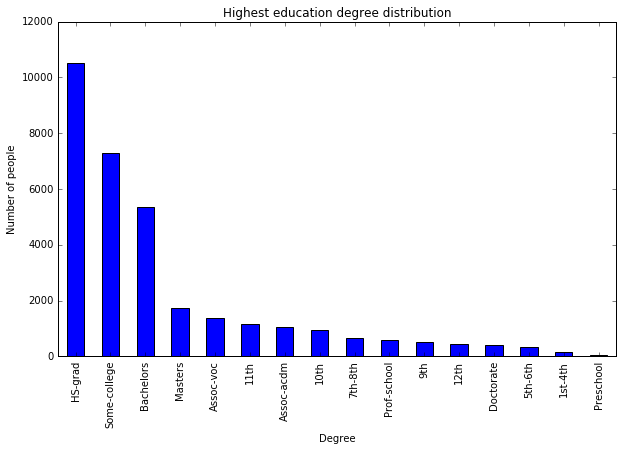

In [8]:
df['education'].value_counts().plot(kind = 'bar', figsize = (10, 6))
plt.title('Highest education degree distribution')
plt.xlabel('Degree')
plt.ylabel('Number of people')
plt.show()

### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

In [9]:
# Среднее
round(df[df['marital-status'] == 'Divorced']['fnlwgt'].mean(), 2)

185802.79

In [10]:
# Стандартное отклонение
round(df[df['marital-status'] == 'Divorced']['fnlwgt'].std(), 2)

105646.79

### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

In [11]:
round(df[df['50K'] == '>50K']['education'].dropna().isin(['Bachelors', 'Masters', 'Doctorate',
                                                         'Prof-school', 'Assoc-acdm',
                                                         'Assoc-voc', 'Some-college']).mean(), 3)

0.755

Ответ: **Правда**

### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

In [12]:
df.groupby(['race', 'sex'])['age'].max()

race                sex   
Amer-Indian-Eskimo  Female    80
                    Male      82
Asian-Pac-Islander  Female    75
                    Male      90
Black               Female    90
                    Male      90
Other               Female    74
                    Male      77
White               Female    90
                    Male      90
Name: age, dtype: int64

### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

In [13]:
df[df['occupation'] == 'Farming-fishing']['native-country'].value_counts().index

Index(['United-States', 'Mexico', 'Puerto-Rico', 'Guatemala', 'Philippines',
       'Italy', 'Vietnam', 'El-Salvador', 'Canada', 'Cuba', 'Germany',
       'France', 'England', 'Ireland', 'Yugoslavia', 'Poland', 'Hong',
       'Cambodia', 'Japan', 'Portugal'],
      dtype='object')

### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


In [14]:
# Мужчины-бакалавры/мужчины-магистры
round(df[(df['sex'] == 'Male') & (df['education'] == 'Bachelors')].shape[0]/\
df[(df['sex'] == 'Male') & (df['education'] == 'Masters')].shape[0], 2)

3.15

In [15]:
# Женщины-бакалавры/женщины-магистры
round(df[(df['sex'] == 'Female') & (df['education'] == 'Bachelors')].shape[0]/\
df[(df['sex'] == 'Female') & (df['education'] == 'Masters')].shape[0], 2)

3.02

### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

In [16]:
# Максимальное количество рабочих часов в неделю
df["hours-per-week"].max()

99

In [17]:
# Количество людей, которые работают 99 часов
df[df['hours-per-week'] == 99].shape[0]

85

In [18]:
# Их заработок
df[df['hours-per-week'] == 99]['50K'].value_counts()

<=50K    60
>50K     25
Name: 50K, dtype: int64